In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## TASKS

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [9]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date" , parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [6]:
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]
months= ['January', 'February', 'March', 
         'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 
         'November', 'December']

3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


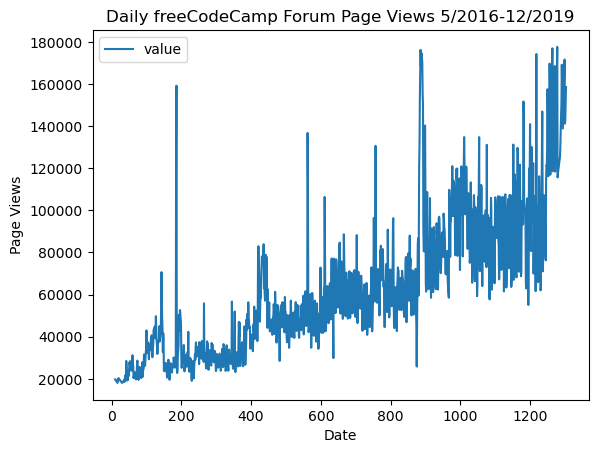

In [7]:
sns.lineplot(data = df, legend="brief")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

4. Draw a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


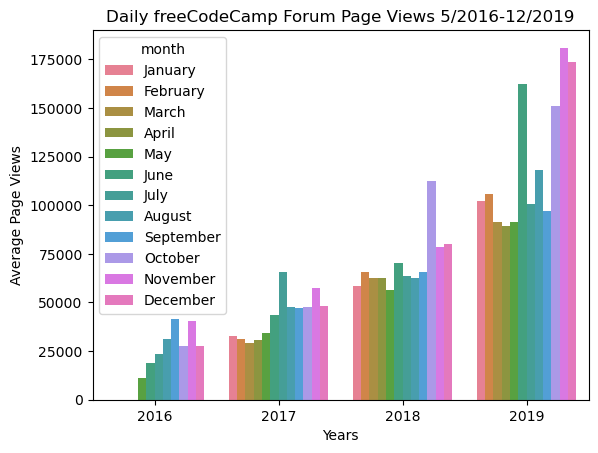

In [12]:
df["year"] = df.index.year.values
df["month"] = df.index.month_name()

sns.barplot(x="year", hue="month", y="value", data=df, hue_order = months, errorbar=None )
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.show()


5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
For each chart, make sure to use a copy of the data frame.

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

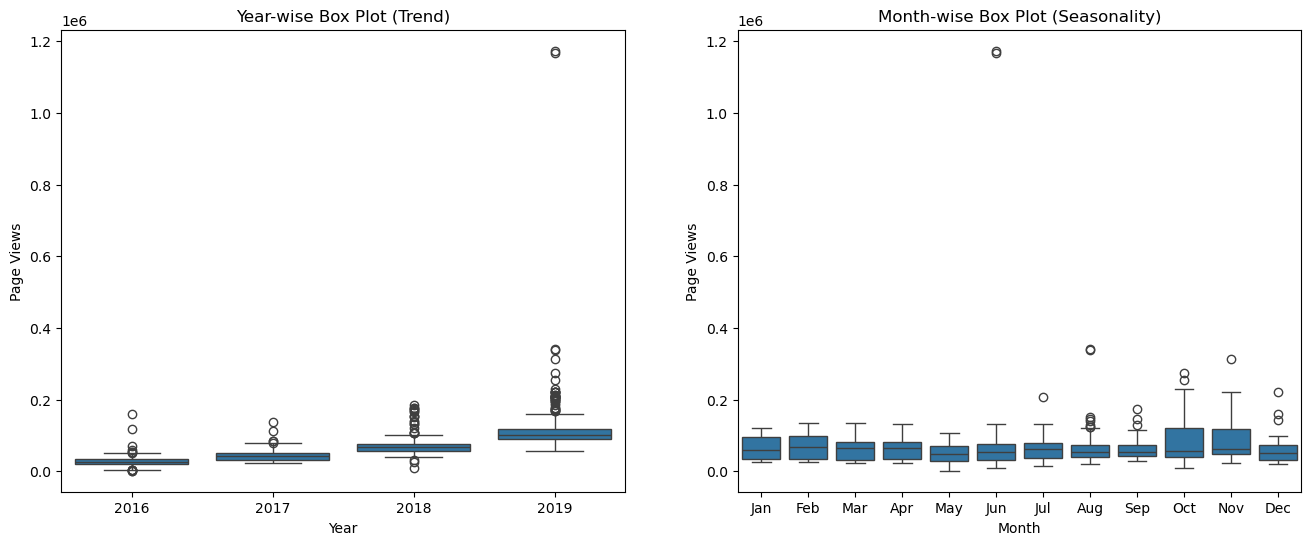

In [13]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['monthnumber'] = df.index.month
df_box = df_box.sort_values('monthnumber')



fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")